# 6002 Project

### Antoniadis Christoforos , Kontoudakis Nikolaos, Tsamoura Evgenia 

In [4]:
# import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
# change the following on your pc!
projectPath = "/home/nikos/Documents/6002_project"
dataPath = projectPath + "/smp500.csv"

In [6]:
smp500 = pd.read_csv(dataPath, sep= ',', header= 0, names=["date",	"open",	"high",	"low", "close",	"adj. close", "volume"])
smp500 = smp500.drop(columns = ["adj. close"])
smp500['date'] = pd.to_datetime(smp500['date'])
# set date as key
smp500= smp500.set_index(smp500['date']).drop(columns='date')

### Data validation

In [8]:
print("There are %s na values" %(smp500.isna().sum().sum()))
print("There are %s zero values" % (smp500[smp500 == 0].sum(numeric_only=True).sum()))

# Check inconsistencies
# at every row low must be the lowest value
print("There are %s rows that the low of the row is higher than any other value" % (smp500[(smp500.low> smp500.high) & (smp500.low> smp500.close) & (smp500.low > smp500.open)].sum(numeric_only=True).sum()))

There are 0 na values
There are 0.0 zero values
There are 0.0 rows that the low of the row is higher than any other value


### Outlier Removal

In [10]:
#check the values of each row per specific column for outliers
def removeOutliers(columnName):
    Zsmp500 = (smp500[columnName] - np.mean(smp500[columnName])) / np.std(smp500[columnName])
    return Zsmp500[(Zsmp500 > 3 ) | (Zsmp500 < -3 )].index
    
# run the function for every column
smp500= smp500.drop(removeOutliers('open'), axis= 0).drop(removeOutliers('high'), axis= 0).drop(removeOutliers('low'), axis= 0).drop(removeOutliers('close'), axis= 0).drop(removeOutliers('volume'), axis= 0)
smp500                                                       

,open,high,low,close,volume
date,,,,,
2024-11-29,6003.98,6044.17,6003.98,6032.38,2444420000
2024-11-27,6014.11,6020.16,5984.87,5998.74,3363340000
2024-11-26,6000.03,6025.42,5992.27,6021.63,3835170000
2024-11-25,5992.28,6020.75,5963.91,5987.37,5633150000
2024-11-22,5944.36,5972.90,5944.36,5969.34,4141420000
...,...,...,...,...,...
2022-01-07,4697.66,4707.95,4662.74,4677.03,4181510000
2022-01-06,4693.39,4725.01,4671.26,4696.05,4295280000
2022-01-05,4787.99,4797.70,4699.44,4700.58,4887960000


### Ploting

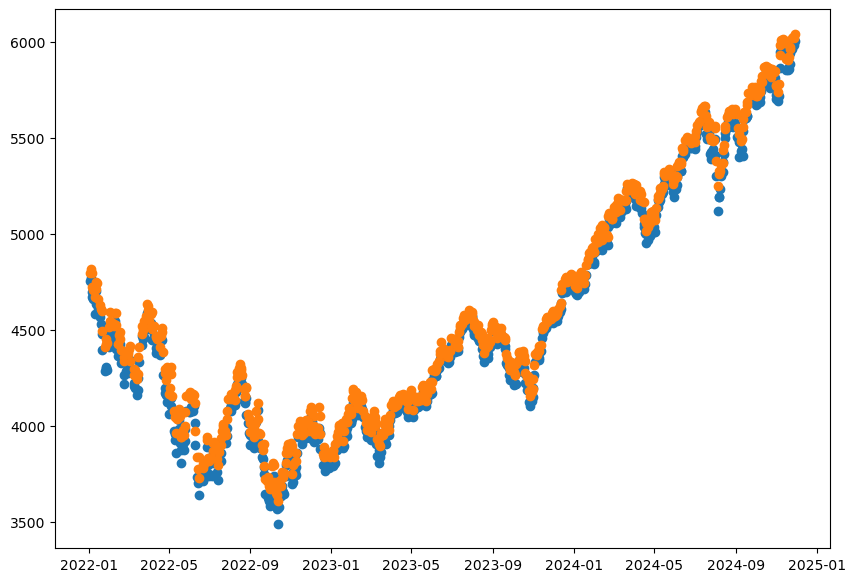

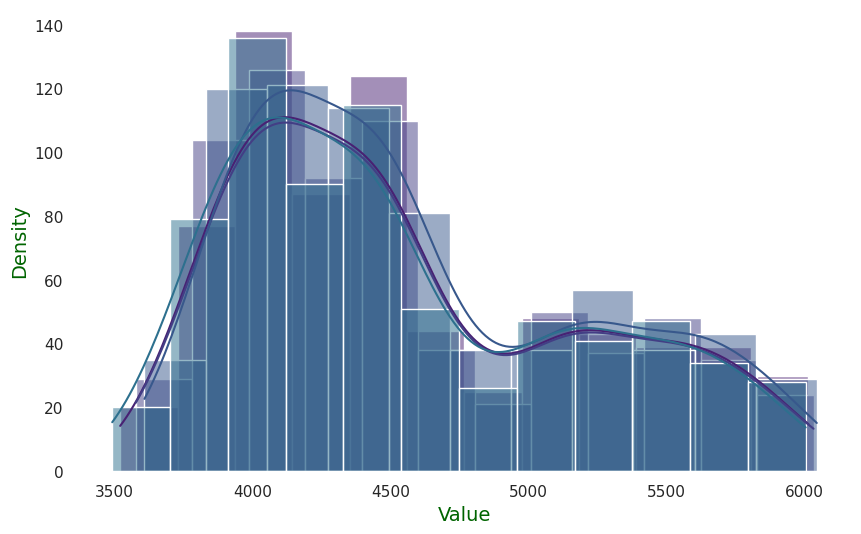

In [12]:
#scater plot
plt.figure(figsize=(10, 7))
plt.scatter(y= smp500.low, x =smp500.index)
plt.scatter(y= smp500.high, x =smp500.index)

# histogram
sns.set(style="white")
colors = sns.color_palette("viridis", n_colors=10)

# plotting the SAT score distribution using Seaborn with a KDE (Kernel Density Estimate) plot
plt.figure(figsize=(10, 6))
sns.histplot(smp500.open, kde=True, color=colors[0])
sns.histplot(smp500.close, kde=True, color=colors[1])
sns.histplot(smp500.high, kde=True, color=colors[2])
sns.histplot(smp500.low, kde=True, color=colors[3])
# sns.histplot(smp500.volume, kde=True, color=colors[3])

# Remove left and bottom spines to eliminate the box
sns.despine(left=True, bottom=True)

# set the title and labels
# plt.title("SAT Score Distribution", fontsize=18, color='darkgreen')
plt.xlabel("Value", fontsize=14, color='darkgreen')
plt.ylabel("Density", fontsize=14, color='darkgreen')


# display the plot
plt.show()

